In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import math
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits, load_diabetes

In [2]:
def euclidean(a, b):
    if len(a) != len(b):
        raise ValueError("Points must have the same dimension")
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(a - b)

In [3]:
def is_feasible(points, k, radius):
  points = np.array(points)
  n = len(points)

  centers = []
  covered = np.zeros(n, dtype=bool)

  for i in range(n):
    if not covered[i]:
      centers.append(points[i])

      for j in range(n):
        if euclidean(points[i], points[j]) <= radius:
          covered[j] = True

  return len(centers) <= k, centers

In [4]:
def branch_n_bound_kcenter(points, k, epsilon=1e-5):
  points = np.array(points)
  n = len(points)

  distances = [euclidean(points[i], points[j]) for i in range(n) for j in range(i+1, n)]

  d_min = min(distances)
  d_max = max(distances)

  low, high = d_min, d_max

  # Binary search on radius R
  while high - low > epsilon:
    mid = (low + high) / 2
    feasible, _ = is_feasible(points, k, mid)

    if feasible:
      high = mid
    else:
      low = mid

  feasible, centers = is_feasible(points, k, high)

  return np.array(centers), high

In [5]:
# Gonzalez is also known as Random Farthest First methos (A greedy approach)
def gonzalez_kcenter(points, k):
  points = np.array(points)
  n = len(points)

  first_index = random.randint(0, n-1)
  centers = [points[first_index]]

  for _ in range(1, k):
    distances = np.array([min(euclidean(p, c) for c in centers) for p in points])

    farthest = np.argmax(distances)
    centers.append(points[farthest])

  final_distances = np.array([min(euclidean(p, c) for c in centers) for p in points])

  radius = np.max(final_distances)

  return np.array(centers), radius

In [6]:

def closest_center(points, centers, max_radius):
    points = np.array(points)
    centers = np.array(centers)

    center_point_relation = []

    for p in points:
        # Compute all Euclidean distances at once
        dists = np.linalg.norm(centers - p, axis=1)
        min_idx = np.argmin(dists)
        min_dist = dists[min_idx]

        if min_dist <= max_radius:
            center_point_relation.append((tuple(p), tuple(centers[min_idx])))

    # Unique centers (convert tuples)
    unique_centers = {c for _, c in center_point_relation}

    return center_point_relation, list(unique_centers)

In [7]:
def plot_kcenter(points, centers, r, title="K-Center Plot", labelX="X", labelY="Y"):

    colours = [
        "red", "green", "blue", "yellow", "orange",
        "lightsteelblue", "brown", "purple", "darksalmon",
        "teal", "black", "pink", "cyan"
    ]

    points = np.array(points)
    centers = np.array(centers)

    # print(f"Point: {points[5]} and Center: {centers[5]}")
    # print(f"Point: {len(points[5])} and Center: {len(centers[5])}")

    # print(f"Number of points before: {len(points)}")
    # print(f"Number of centers before: {len(centers)}")

    relations, used_centers = closest_center(points, centers, r)

    # print(f"Relations: {relations[5]} and Centers: {used_centers[5]}")
    # print(f"Relations: {len(relations[5])} and Centers: {len(used_centers[5])}")


    used_centers_set = {tuple(uc) for uc in used_centers}
    cts = np.array(used_centers)

    pts = np.array([p for (p, _) in relations if tuple(p) not in used_centers_set])


    # print(f"Number of points after: {len(pts)}")
    # print(f"Number of centers after: {len(cts)}")


    center_index = {tuple(c): i for i, c in enumerate(cts)}

    colors_for_points = [colours[center_index[c]] for (p, c) in relations if tuple(p) not in used_centers_set]


    plt.figure(figsize=(10, 10))

    plt.scatter(pts[:, 0], pts[:, 1], c=colors_for_points, marker="o")
    plt.scatter(cts[:, 0], cts[:, 1], color='black', s=150, marker="x", label="Centers")

    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.grid(True)
    plt.show()

In [8]:
points = []

for i in range(25):
  for j in range(25):
    points.append((random.randint(0, 25), random.randint(0, 25)))

# points

In [9]:
cg, cg_cost = gonzalez_kcenter(points, 9)

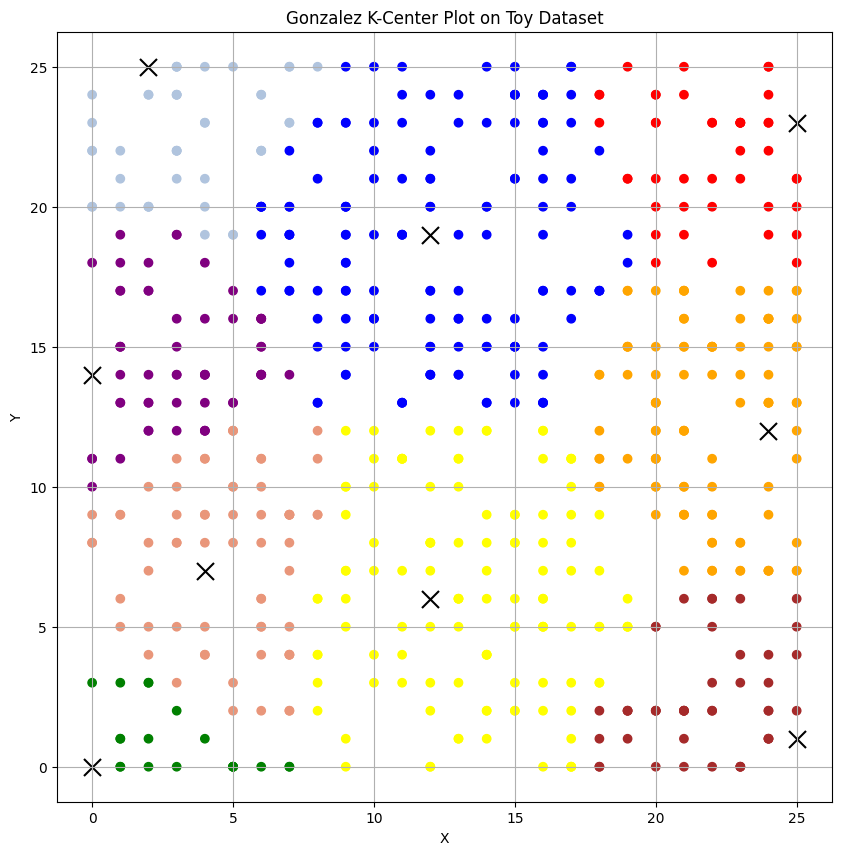

In [10]:
plot_kcenter(points, cg, cg_cost, title="Gonzalez K-Center Plot on Toy Dataset")

In [11]:
chs, chs_cost = branch_n_bound_kcenter(points, 9)

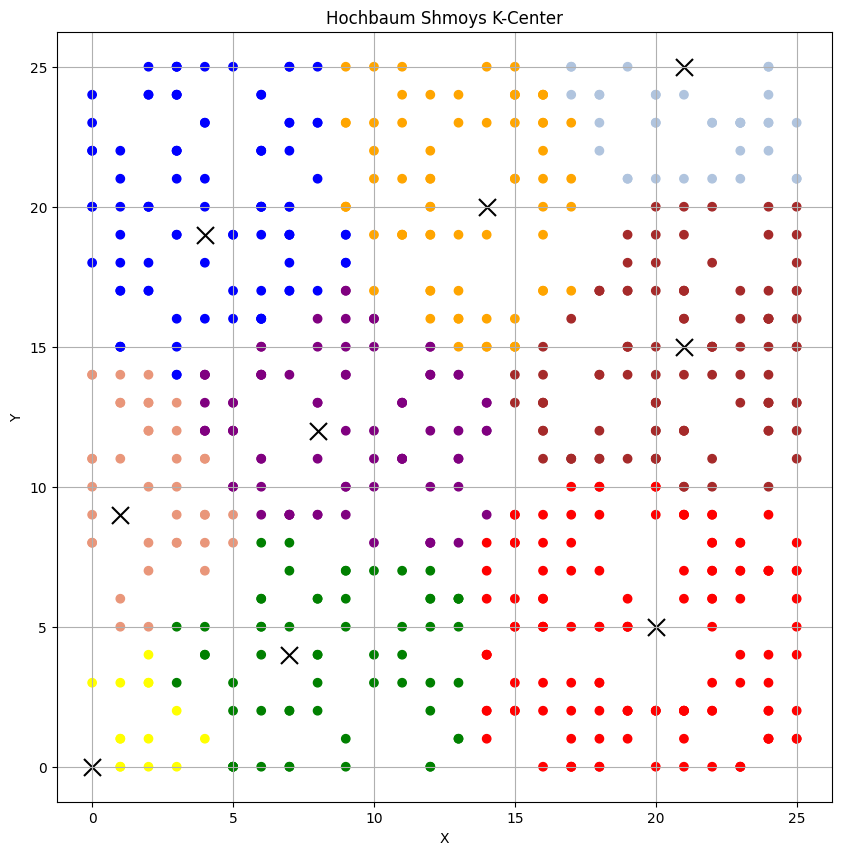

In [12]:
plot_kcenter(points, chs, chs_cost, title="Hochbaum Shmoys K-Center")

In [13]:
k = [3, 6, 9]
results = []
method = None
dataset = None

# Iris Dataset

In [14]:
iris_points = load_iris().data
dataset = "Iris"

In [15]:
method = "Gonzalez"
for i in range(len(k)):
  start = time.time()
  iris_gonzalez, iris_gonzalez_cost = gonzalez_kcenter(iris_points, k[i])
  runtime = time.time() - start
  results.append((method, dataset,k[i], iris_gonzalez_cost, runtime))

In [16]:
method = "Branch and Bound"
for i in range(len(k)):
  start = time.time()
  iris_bnb, iris_bnb_cost = branch_n_bound_kcenter(iris_points, k[i])
  runtime = time.time() - start
  results.append((method, dataset,k[i], iris_bnb_cost, runtime))

# Wine Dataset

In [17]:
wine_points = load_wine().data
dataset = "Wine"

In [18]:
method = "Gonzalez"
for i in range(len(k)):
  start = time.time()
  wine_gonzalez, wine_gonzalez_cost = gonzalez_kcenter(wine_points, k[i])
  runtime = time.time() - start
  results.append((method, dataset,k[i], wine_gonzalez_cost, runtime))

In [19]:
method = "Branch and Bound"
for i in range(len(k)):
  start = time.time()
  wine_bnb, wine_bnb_cost = branch_n_bound_kcenter(wine_points, k[i])
  runtime = time.time() - start
  results.append((method, dataset,k[i], wine_bnb_cost, runtime))

# Breast Cancer

In [20]:
bc_points = load_breast_cancer().data
dataset = "Breast Cancer"

In [21]:
method = "Gonzalez"
for i in range(len(k)):
  start = time.time()
  bc_gonzalez, bc_gonzalez_cost = gonzalez_kcenter(bc_points, k[i])
  runtime = time.time() - start
  results.append((method, dataset,k[i], bc_gonzalez_cost, runtime))

In [22]:
method = "Branch and Bound"
for i in range(len(k)):
  start = time.time()
  bc_bnb, bc_bnb_cost = branch_n_bound_kcenter(bc_points, k[i])
  runtime = time.time() - start
  results.append((method, dataset,k[i], bc_bnb_cost, runtime))

# MNIST Dataset

In [23]:
mnist_points = load_digits().data
dataset = "MNIST Digits (8X8)"

In [24]:
method = "Gonzalez"
for i in range(len(k)):
  start = time.time()
  mnist_gonzalez, mnist_gonzalez_cost = gonzalez_kcenter(mnist_points, k[i])
  runtime = time.time() - start
  results.append((method, dataset,k[i], mnist_gonzalez_cost, runtime))

In [25]:
method = "Branch and Bound"
for i in range(len(k)):
  start = time.time()
  mnist_bnb, mnist_bnb_cost = branch_n_bound_kcenter(mnist_points, k[i])
  runtime = time.time() - start
  results.append((method, dataset,k[i], mnist_bnb_cost, runtime))

# Diabetes Dataset

In [26]:
diabetes_points = load_diabetes().data
dataset = "Diabetes"

In [27]:
method = "Gonzalez"
for i in range(len(k)):
  start = time.time()
  diabetes_gonzalez, diabetes_gonzalez_cost = gonzalez_kcenter(diabetes_points, k[i])
  runtime = time.time() - start
  results.append((method, dataset,k[i], diabetes_gonzalez_cost, runtime))

In [28]:
method = "Branch and Bound"
for i in range(len(k)):
  start = time.time()
  diabetes_bnb, diabetes_bnb_cost = branch_n_bound_kcenter(diabetes_points, k[i])
  runtime = time.time() - start
  results.append((method, dataset,k[i], diabetes_bnb_cost, runtime))

In [29]:
df = pd.DataFrame(results, columns=["Method Used", "Dataset Used", "k", "Cost", "Runtime (ms)"])
df.to_csv("results.csv", index=False)

df

,Method Used,Dataset Used,k,Cost,Runtime (ms)
0,Gonzalez,Iris,3,2.242766,0.026871
1,Gonzalez,Iris,6,1.539480,0.044999
2,Gonzalez,Iris,9,1.220656,0.064668
3,Branch and Bound,Iris,3,2.549513,0.267464
4,Branch and Bound,Iris,6,1.349076,0.390719
5,Branch and Bound,Iris,9,1.104541,0.508933
6,Gonzalez,Wine,3,420.001719,0.011012
7,Gonzalez,Wine,6,172.627050,0.032999
8,Gonzalez,Wine,9,120.935908,0.132831
9,Branch and Bound,Wine,3,385.764058,0.436255
